In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_excel("mall.xlsx")

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
df.drop("CustomerID", axis = 1, inplace = True)

In [74]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [75]:
df.rename(columns = {"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}, inplace = True)

In [76]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [77]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# Visualization

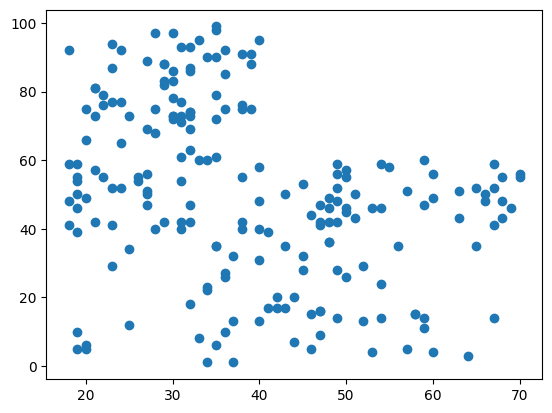

In [78]:
plt.scatter(df.Age, df.Score)

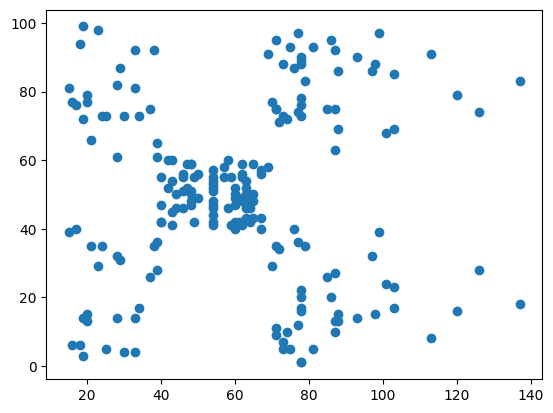

In [79]:
plt.scatter(df.Income, df.Score)

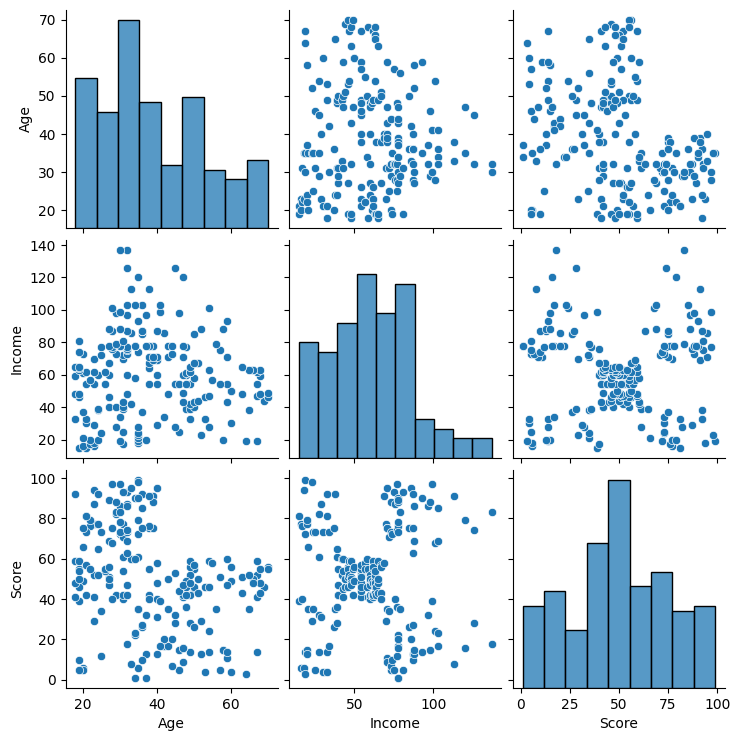

In [80]:
sns.pairplot(df[['Age', 'Income', 'Score']])

In [81]:
import sklearn.cluster as cluster

In [82]:
kmeans = cluster.KMeans()

In [83]:
pred = kmeans.fit_predict(df[['Income', 'Score']])

In [84]:
pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 6, 4, 6, 6,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 5, 1, 5, 1,
       2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 2, 1, 5, 1, 2, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 2, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7,
       3, 7])

In [85]:
df2 = df.copy()

In [86]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [87]:
df2['Predicted'] = pred

In [88]:
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


In [89]:
centers = kmeans.cluster_centers_
centers

array([[ 25.14285714,  19.52380952],
       [ 78.03571429,  81.89285714],
       [ 63.95238095,  46.21428571],
       [109.7       ,  22.        ],
       [ 25.0952381 ,  80.04761905],
       [ 80.18181818,  12.68181818],
       [ 47.44444444,  51.24444444],
       [108.18181818,  82.72727273]])

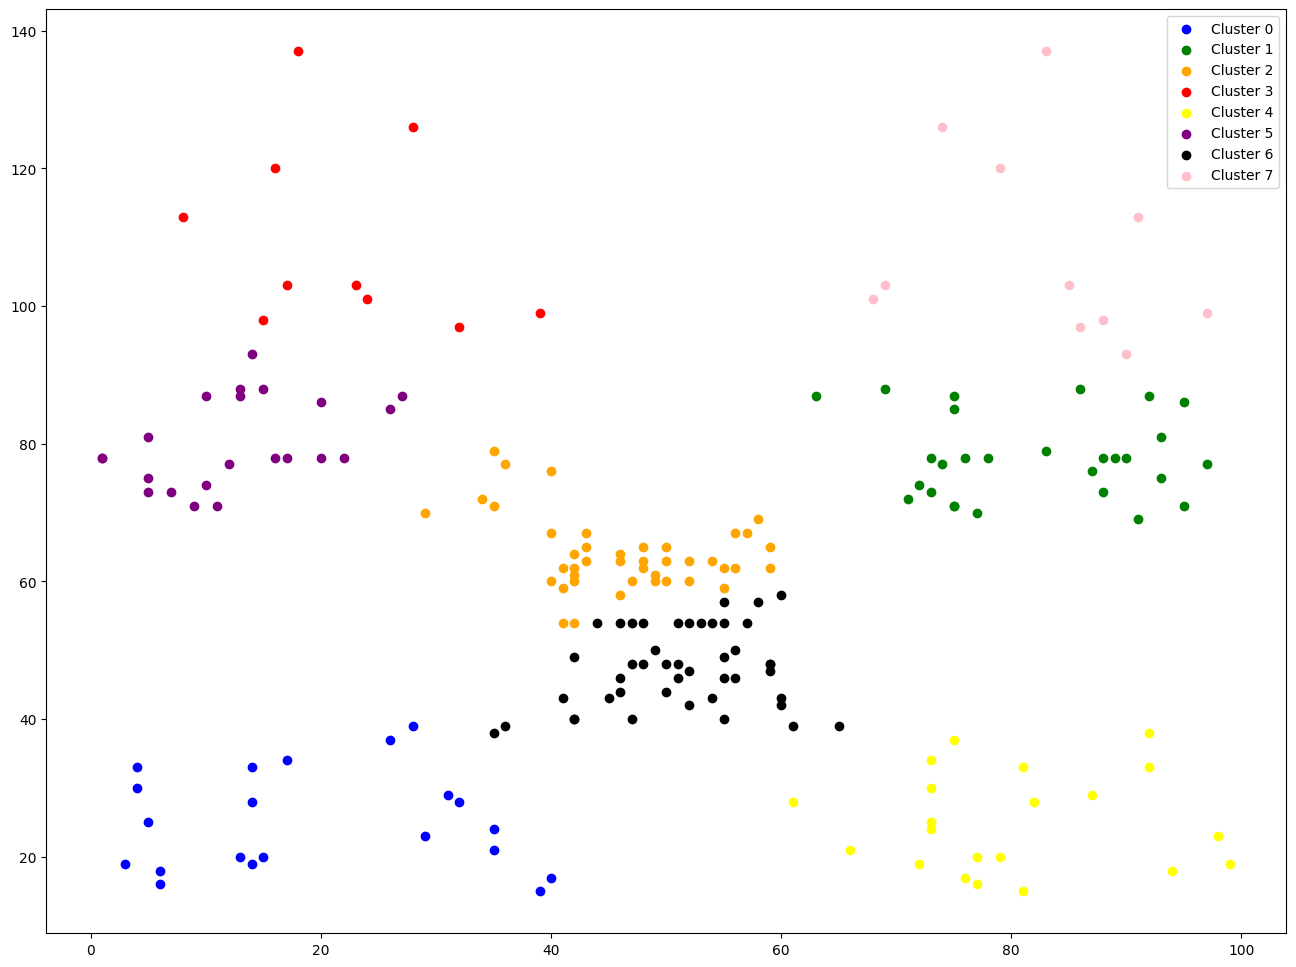

In [90]:
df0 = df2[df2.Predicted == 0]
df1 = df2[df2.Predicted == 1]
df8 = df2[df2.Predicted == 2]
df3 = df2[df2.Predicted == 3]
df4 = df2[df2.Predicted == 4]
df5 = df2[df2.Predicted == 5]
df6 = df2[df2.Predicted == 6]
df7 = df2[df2.Predicted == 7]

plt.figure(figsize = (16, 12))
plt.scatter(df0['Score'], df0['Income'], color = 'blue', label = 'Cluster 0')
plt.scatter(df1['Score'], df1['Income'], color = 'green', label = 'Cluster 1')
plt.scatter(df8['Score'], df8['Income'], color = 'orange', label = 'Cluster 2')
plt.scatter(df3['Score'], df3['Income'], color = 'red', label = 'Cluster 3')
plt.scatter(df4['Score'], df4['Income'], color = 'yellow', label = 'Cluster 4')
plt.scatter(df5['Score'], df5['Income'], color = 'purple', label = 'Cluster 5')
plt.scatter(df6['Score'], df6['Income'], color = 'black', label = 'Cluster 6')
plt.scatter(df7['Score'], df7['Income'], color = 'pink', label = 'Cluster 7')

plt.legend()

In [91]:
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


# Elbow Method

In [92]:
from sklearn.cluster import KMeans

In [93]:
wcss = []

In [94]:
cluster = range(1, 15)
for k in cluster:
    kmean = KMeans(n_clusters = k)
    kmean.fit(df[['Income', 'Score']])
    wcss.append(kmean.inertia_)

In [95]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37239.83554245604,
 30273.39431207004,
 25018.576334776335,
 21862.092672182887,
 19999.38258827042,
 17577.68782886206,
 16049.714149902386,
 14339.526424097723,
 13101.505923511972]

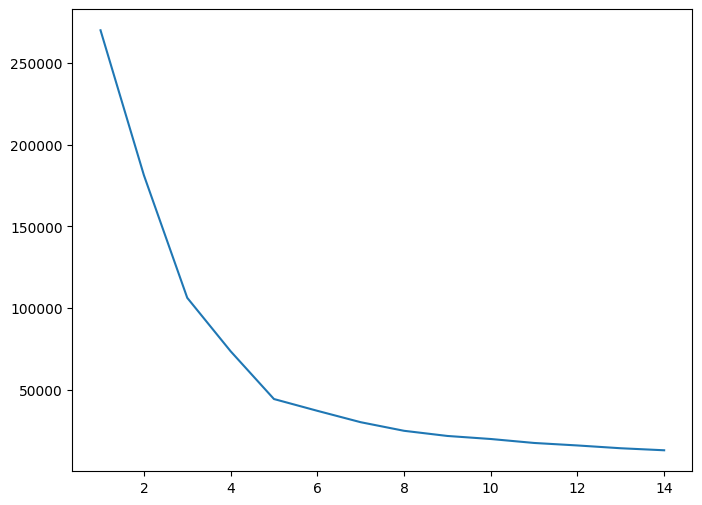

In [96]:
plt.figure(figsize = (8, 6))
plt.plot(cluster, wcss)

In [97]:
from kneed import KneeLocator

In [98]:
kn = KneeLocator(cluster, wcss, curve = 'convex', direction = 'decreasing')
kn

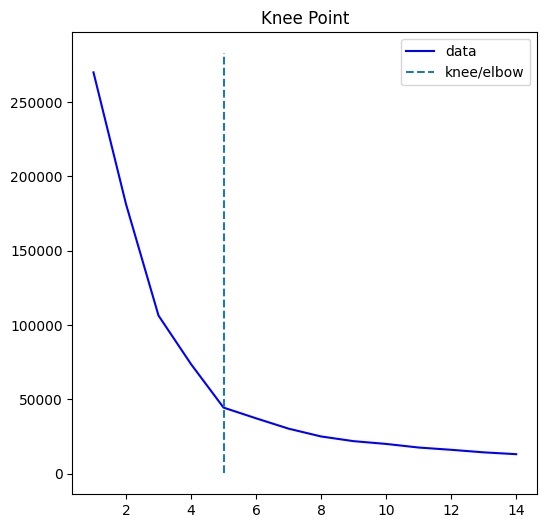

In [99]:
kn.plot_knee()

# After select best k

In [100]:
import sklearn.cluster as cluster

In [101]:
kmeans = cluster.KMeans(n_clusters = 5)

In [102]:
predicted = kmeans.fit_predict(df[['Income', 'Score']])
predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [103]:
df['Predicted'] = predicted

In [104]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


In [106]:
center2 = kmeans.cluster_centers_
center2

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

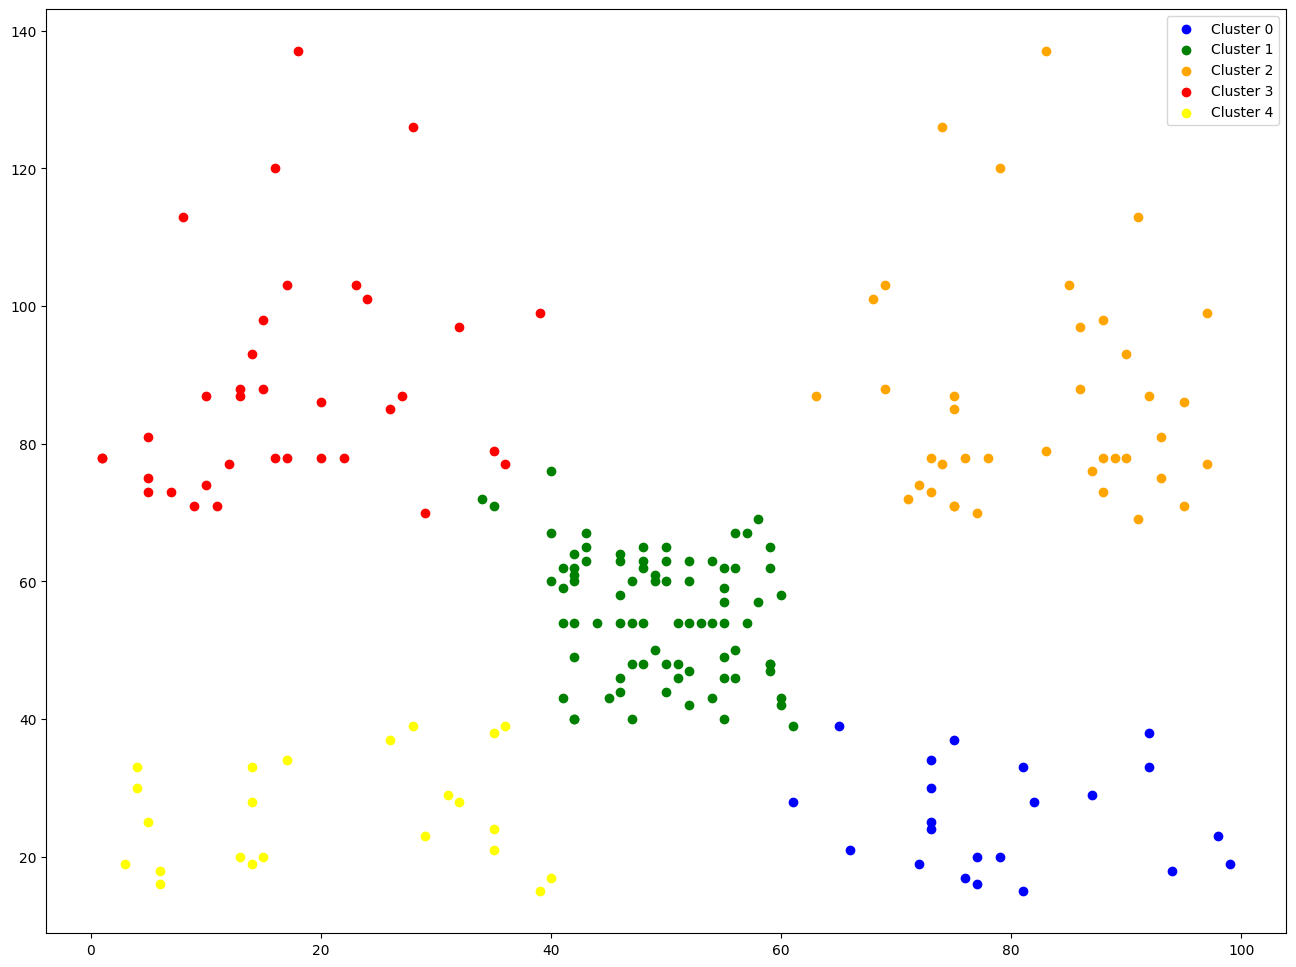

In [107]:
df0 = df[df.Predicted == 0]
df1 = df[df.Predicted == 1]
df2 = df[df.Predicted == 2]
df3 = df[df.Predicted == 3]
df4 = df[df.Predicted == 4]
df5 = df[df.Predicted == 5]
df6 = df[df.Predicted == 6]
df7 = df[df.Predicted == 7]

plt.figure(figsize = (16, 12))
plt.scatter(df0['Score'], df0['Income'], color = 'blue', label = 'Cluster 0')
plt.scatter(df1['Score'], df1['Income'], color = 'green', label = 'Cluster 1')
plt.scatter(df2['Score'], df2['Income'], color = 'orange', label = 'Cluster 2')
plt.scatter(df3['Score'], df3['Income'], color = 'red', label = 'Cluster 3')
plt.scatter(df4['Score'], df4['Income'], color = 'yellow', label = 'Cluster 4')

plt.legend()